In [1]:
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [3]:
def detect_obj(image):
    tensor_image = torch.tensor(image)
    tensor_image = tensor_image.permute(2, 0, 1)
    img_01 = tensor_image / 255.
    model.eval()
    predictions = model([img_01])
    #print(predictions[0]['scores'])
    #print(predictions[0]['boxes'][0][0].item())
    if predictions[0]['scores'][0] > 0.5:
        box = predictions[0]['boxes'][0]
        point1 = (round(box[0].item()), round(box[1].item()))
        point2 = (round(box[2].item()), round(box[3].item()))
        #print(point1)
        #print(point2)
        image = cv2.rectangle(image, point1, point2, (255,0,0), 2)
    return image

In [11]:
def video_func(file_name):
    counter = 0
    cap = cv2.VideoCapture(file_name)
    (grabbed, frame) = cap.read()
    fshape = frame.shape
    fheight = fshape[0]
    fwidth = fshape[1]
    #print (fwidth , fheight)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi', fourcc, 24.0, (fwidth, fheight))
    while(cap.isOpened()):
        ret, frame = cap.read()
        counter += 1
        if counter % 5 == 0:
            print(counter)
        if ret:
            frame = detect_obj(frame)
            out.write(frame)
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [12]:
video_func('small_queue.mp4')

5
10
15


In [5]:
image = cv2.imread('cat.jpg')

/home/zizitopa/anaconda3/envs/abct/lib/python3.8/site-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/opt/conda/conda-bld/pytorch_1591914858187/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


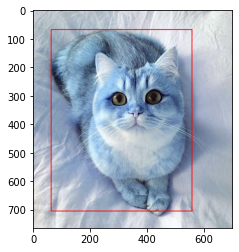

In [6]:
image2 = detect_obj(image)
plt.imshow(image2)